In [1]:
import tensorflow as tf
import numpy as np
import IPython.display as display

In [2]:
# Check first batch
record_file0 = "data/tf_records/train/train-00000-of-00128"

In [3]:
# Convert to TF Dataset
dataset = tf.data.TFRecordDataset(record_file0, buffer_size=100)

In [4]:
# Decoding function
def parse_record(record):
    name_to_features = {
        'image/class/label': tf.io.FixedLenFeature([], tf.int64),
        'image/class/synset': tf.io.FixedLenFeature([], tf.string),
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
    }
    return tf.io.parse_single_example(record, name_to_features)

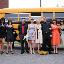

146 b'n04146614'


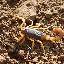

8 b'n01770393'


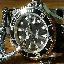

156 b'n04328186'


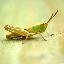

40 b'n02226429'


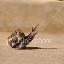

16 b'n01944390'


In [5]:
# Take some and manually check if image matches label
# You should probably need words.txt

for record in dataset.take(5):

    parsed = parse_record(record)

    image = parsed["image/encoded"].numpy()
    label = parsed["image/class/label"].numpy()
    synset = parsed["image/class/synset"].numpy()

    display.display(display.Image(data=image))
    print(label, synset)
